# 文本处理

- 词袋模型：离散、高维、稀疏。
- 分布式表示：连续、低维、稠密。
- word2vec词向量原理并实践，用来表示文本。
- word2vec 中的数学原理详解（一）目录和前言 - peghoty - CSDN博客  https://blog.csdn.net/itplus/article/details/37969519
- word2vec原理推导与代码分析-码农场  http://www.hankcs.com/nlp/word2vec.html

## 词袋模型：离散、高维、稀疏

参考 https://www.jianshu.com/p/f8300129b568

Bag-of-words模型是信息检索领域常用的文档表示方法。在信息检索中，BOW模型假定对于一个文档，忽略它的单词顺序和语法、句法等要素，将其仅仅看作是若干个词汇的集合，文档中每个单词的出现都是独立的，不依赖于其它单词是否出现。也就是说，文档中任意一个位置出现的任何单词，都不受该文档语意影响而独立选择的。


`词袋模型的缺点`： 

词袋模型最重要的是构造词表，然后通过文本为词表中的词赋值，<font color='red'>但词袋模型严重缺乏相似词之间的表达</font>。 

比如“我喜欢北京”“我不喜欢北京”其实这两个文本是严重不相似的。但词袋模型会判为高度相似。 

“我喜欢北京”与“我爱北京”其实表达的意思是非常非常的接近的，但词袋模型不能表示“喜欢”和“爱”之间严重的相似关系。（当然词袋模型也能给这两句话很高的相似度，但是注意我想表达的含义）


具体案例： 

```
两个文档：     

1：Bob likes to play basketball, Jim likes too.     
2：Bob also likes to play football games.    

基于这两个文本文档，构造一个词典如下：Dictionary = 
{1:”Bob”, 2. “like”, 3. “to”, 4. “play”, 5. “basketball”, 6. “also”, 7. “football”, 8. “games”, 9. “Jim”, 10. “too”}。    
    这个词典一共包含10个不同的单词，利用词典的索引号，上面两个文档每一个都可以用一个10维向量表示（用整数数字0~n（n为正整数）表示某个单词在文档中出现的次数）：    
    1：[1, 2, 1, 1, 1, 0, 0, 0, 1, 1]     
    2：[1, 1, 1, 1 ,0, 1, 1, 1, 0, 0]    
    
由此可以看出此向量的构建是根据该词在词典出现的次数而构成的，比如第一条文本中的”likes”,这个词在文本中出现了2次，所以基于词袋的文本向量是根据词出现的饿次数构建的。但是此向量与文本中单词出现的顺序没有关系，只是一种频率的表示，该方法容易实现，但是有很大的问题：

    维数灾难：假如词典包含10000个单词，那么每个文本需要使用10000维的向量表示，那么向量的很多位置必定是0，如此稀疏的高维向量会严重影响计算速度。
    这样构成的向量无法保存词序信息，而词序对于自然语言处理又是那么的重要。

    存在语义鸿沟
```

可以想象，对于多篇文章而言，转换为词向量会出现高维、稀疏的矩阵


## word2vec 

参考 
- http://www.hankcs.com/nlp/word2vec.html
- https://blog.csdn.net/lilong117194/article/details/81979522


此时我们需要一个模型就是能在使文本向量化的同时也保留了词序的信息。分布式假说的提出就是解决了语义信息的问题。该方法的思想是：上下文相似的词，其语义也相似，随后就有了基于上下文分布表示词义的方法，这就是“词空间模型“。Word2Vec可以将One-Hot Encoder转化为低维度的连续值，也就是稠密向量，并且其中意思相近的词将被映射到向量空间中相近的位置。而使用神经网络可以灵活的对上下文进行建模，也因此成为用的比较多的方法。


神经概率语言模型（Neural Probabilistic Language Model）中词的表示是向量形式、面向语义的。两个语义相似的词对应的向量也是相似的，具体反映在夹角或距离上。甚至一些语义相似的二元词组中的词语对应的向量做线性减法之后得到的向量依然是相似的。词的向量表示可以显著提高传统NLP任务的性能.

从向量的角度来看，字符串形式的词语其实是更高维、更稀疏的向量。若词汇表大小为N，每个字符串形式的词语字典序为i，则其被表示为一个N维向量，该向量的第i维为1，其他维都为0。汉语的词汇量大约在十万这个量级，十万维的向量对计算来讲绝对是个维度灾难。而word2vec得到的词的向量形式（下文简称“词向量”，）则可以自由控制维度，一般是100左右。

## 模型介绍

### Hierarchical Softmax

one-hot向量作为word2vec的输入，通过word2vec训练低维词向量（word embedding） 
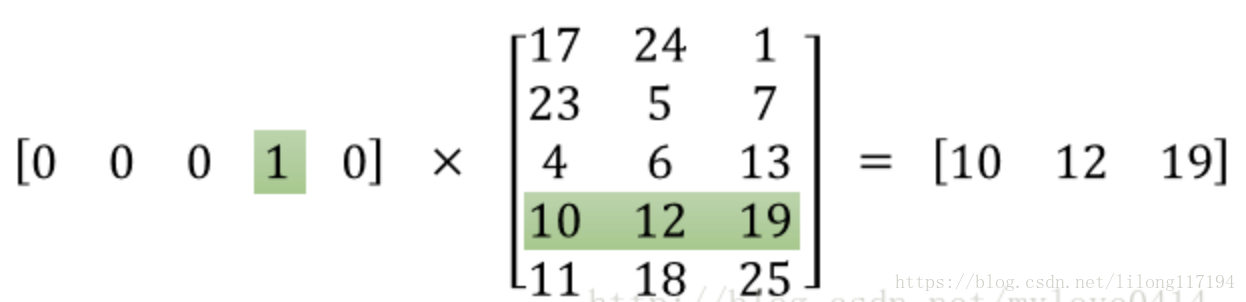

输入层：One-Hot Vector 
隐藏层：没有激活函数，也就是线性的单元。 
输出层：维度跟输入层的维度一样，用的是Softmax回归。 
我们要获取的dense vector其实就是Hidden Layer的输出单元。有的地方定为Input Layer和Hidden Layer之间的权重，其实说的是一回事。

下面用具体的例子看下：
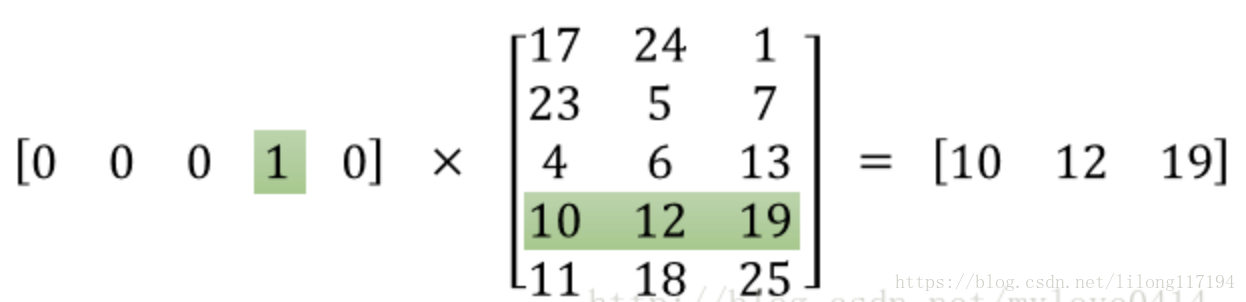

可以看出： 
输入层：5个神经元 
隐藏层：3个神经元 
所以权重矩阵是5x3的大小，可以看出权重矩阵中的[10,12,19]和前向传播后[10,12,19]是一样的。


word2vec作为神经概率语言模型的输入，其本身其实是神经概率模型的副产品，是为了通过神经网络学习某个语言模型而产生的中间结果。具体来说，“某个语言模型”指的是“CBOW”和“Skip-gram”。具体学习过程会用到两个降低复杂度的近似方法——Hierarchical Softmax或Negative Sampling。两个模型乘以两种方法，一共有四种实现。



- 两种模型的网络结构是：

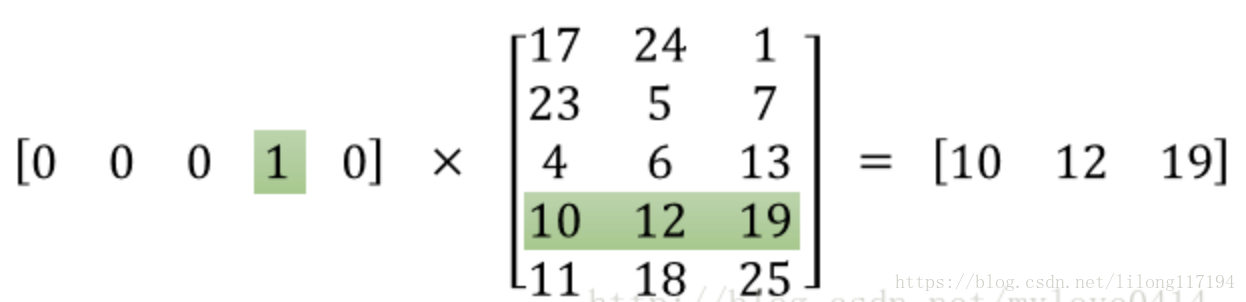

其中w(t)代表当前词语位于句子的位置t，同理定义其他记号。在窗口内（上图为窗口大小为5），除了当前词语之外的其他词语共同构成上下文。

### CBOW

word2vec主要分为CBOW（Continuous Bag of Words）和Skip-Gram两种模式。CBOW是从原始语句推测目标字词；而Skip-Gram正好相反，是从目标字词推测出原始语句。CBOW对小型数据库比较合适，而Skip-Gram在大型语料中表现更好。

CBOW 是 Continuous Bag-of-Words Model 的缩写，是一种根据上下文的词语预测当前词语的出现概率的模型。其图示如上图左。

CBOW是已知上下文，估算当前词语的语言模型。其学习目标是最大化对数似然函数

$$
\mathcal{L}=\sum_{w \in \mathcal{C}} \log p(w | \text { Context }(w))
$$

其中，w表示语料库C中任意一个词。从上图可以看出，对于CBOW，

输入层是上下文的词语的词向量

投影层对其求和，所谓求和，就是简单的向量加法。

输出层输出最可能的w。由于语料库中词汇量是固定的|C|个，所以上述过程其实可以看做一个多分类问题。给定特征，从|C|个分类中挑一个。

- 训练CBOW模型，词向量只是个副产品，确切来说，是CBOW模型的一个参数。训练开始的时候，词向量是个随机值，随着训练的进行不断被更新）。

对于神经网络模型多分类，最朴素的做法是softmax回归：

$$
h_{\theta}\left(x^{(i)}\right)=\left[\begin{array}{c}{p\left(y^{(i)}=1 | x^{(i)} ; \theta\right)} \\ {p\left(y^{(i)}=2 | x^{(i)} ; \theta\right)} \\ {\vdots} \\ {p\left(y^{(i)}=k | x^{(i)} ; \theta\right)}\end{array}\right]=\frac{1}{\sum_{j=1}^{k} e^{\theta_{j}^{T} x^{(i)}}}\left[\begin{array}{c}{e^{\theta_{1}^{T} x^{(i)}}} \\ {e^{\theta_{2}^{T} x^{(i)}}} \\ {\vdots} \\ {e^{\theta_{k}^{\prime} x^{(i)}}}\end{array}\right]
$$

softmax回归需要对语料库中每个词语（类）都计算一遍输出概率并进行归一化，在几十万词汇量的语料上无疑是令人头疼的。

SVM中的多分类结构，应用到word2vec中被作者称为Hierarchical Softmax：

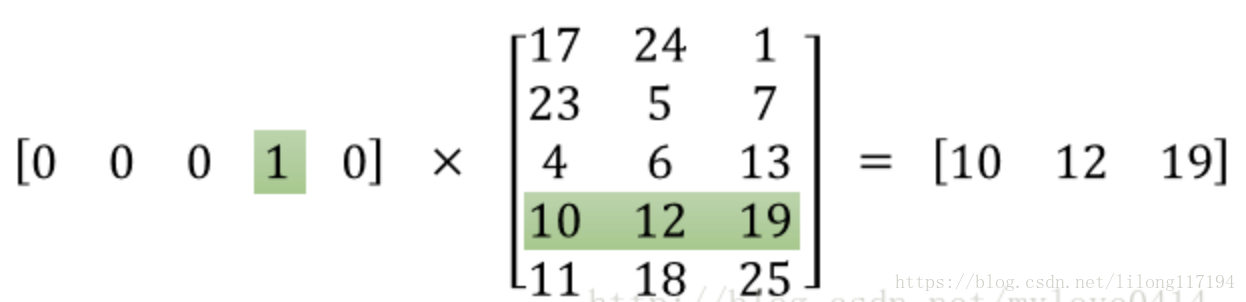

上图输出层的树形结构即为Hierarchical Softmax。

具体原理公式推导需在研究下



### Skip-gram
原理

Skip-gram只是逆转了CBOW的因果关系而已，即已知当前词语，预测上下文。

其网络结构如下图所示：

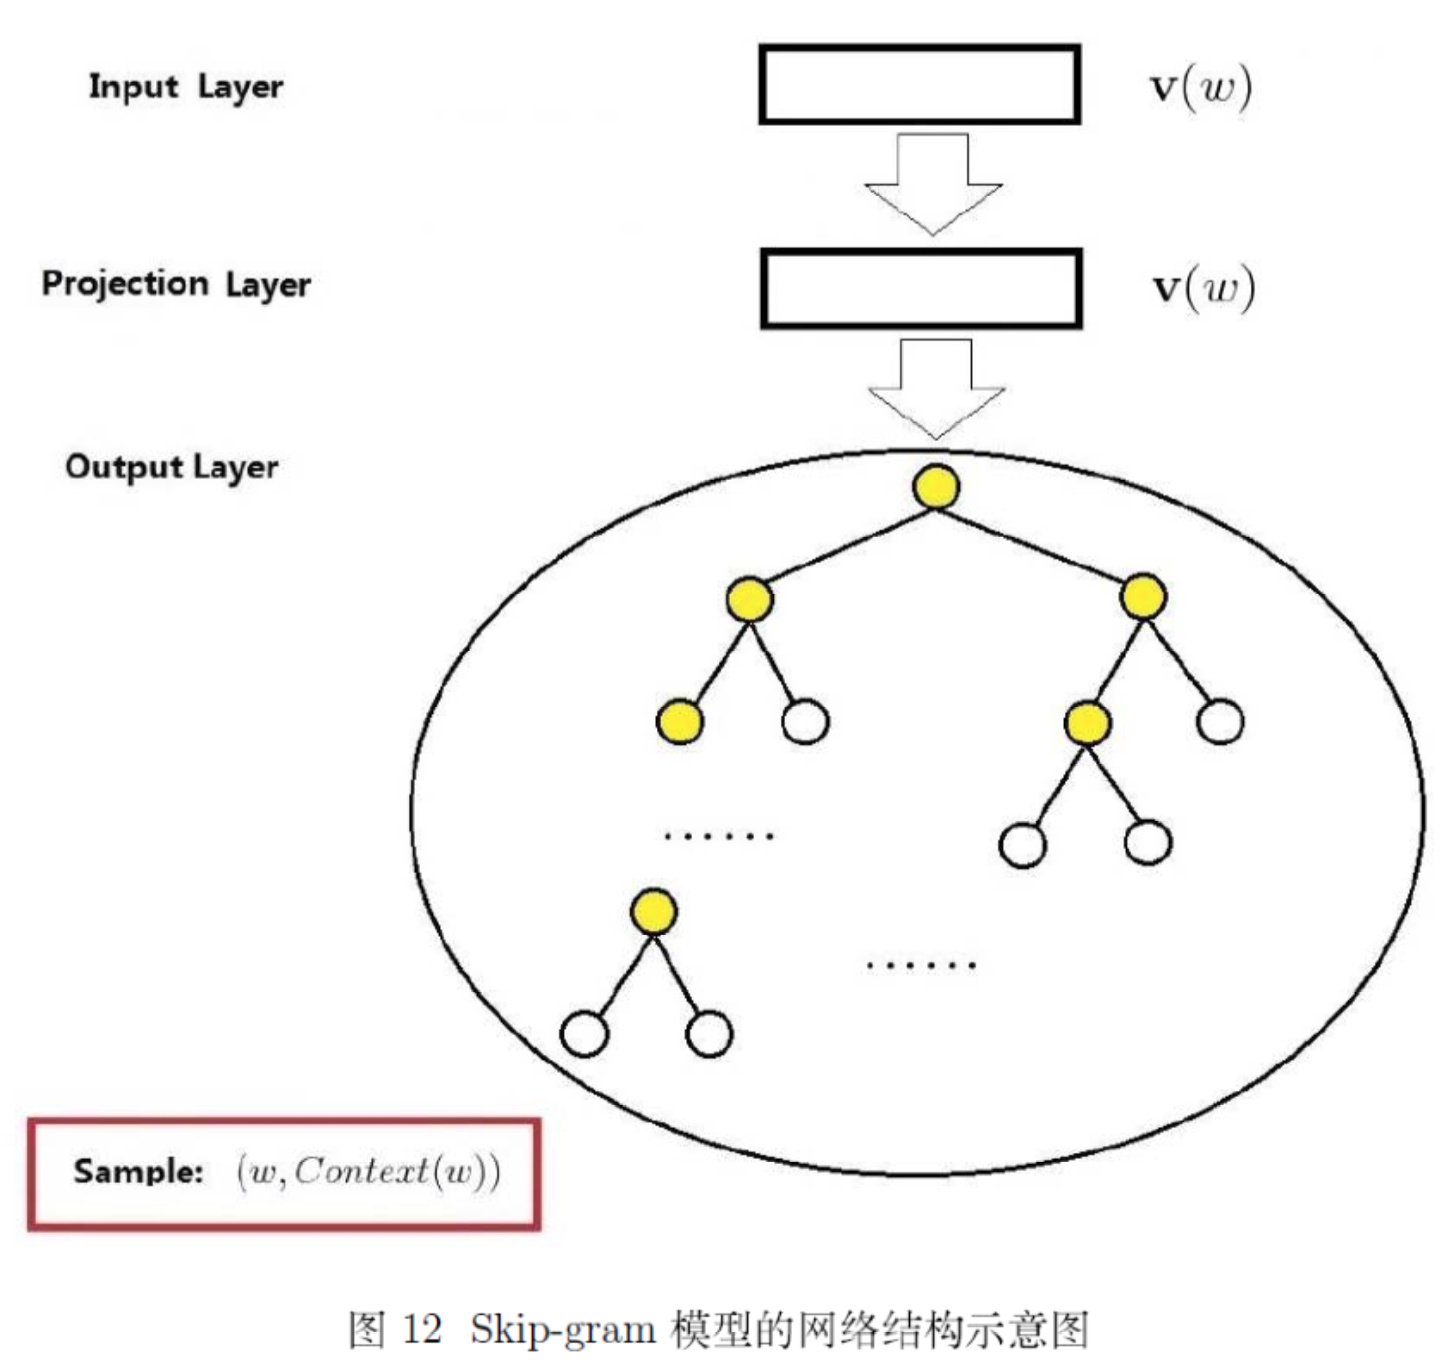

上图与CBOW的两个不同在于

输入层不再是多个词向量，而是一个词向量

投影层其实什么事情都没干，直接将输入层的词向量传递给输出层。

## Negative Sampling

无论是CBOW还是Skip-gram模型，其实都是分类模型。对于机器学习中的分类任务，在训练的时候不但要给正例，还要给负例。对于Hierarchical Softmax，负例是二叉树的其他路径。对于Negative Sampling，负例是随机挑选出来的。据说Negative Sampling能提高速度、改进模型质量。

## Huffman树
实现word2vec用任何二叉树都可以。Huffman树只是二叉树中具体的一种，特别适合word2vec的训练。

word2vec训练的时候按照词频将每个词语Huffman编码，由于Huffman编码中词频越高的词语对应的编码越短。所以越高频的词语在Hierarchical Softmax过程中经过的二分类节点就越少，整体计算量就更少了。


## sigmoid函数

类似的查表方法还有sigmoid函数的计算，因为该函数使用太频繁，而其值仅仅在靠近0的时候才会剧烈变化，远离0的方向很快趋近0和1。所以源码中也采用了“刻度查表”的方法，先算出了很多个刻度对应的函数值，运算中直接查表。